<a href="https://colab.research.google.com/github/lunaB/Python-Algorithm/blob/master/Sobel%2BRANSAC_%EC%B0%A8%EC%84%A0%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 19010642 영채쟝의 코딩강습

In [ ]:
# 아이디어
# 일정 밝기가 넘는 애들만 골라서 그애의 x,y값을 빼고 그거를 데이터셋으로 학습키자

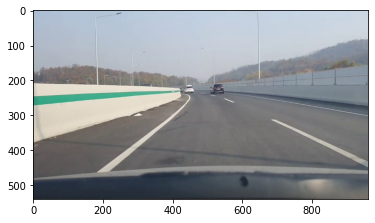

done


In [9]:
# 동영상 사용

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

vidcap = cv2.VideoCapture('test2.mp4')
ret, image = vidcap.read()
height, width = image.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'X264')
vidwr = cv2.VideoWriter('output.mp4', fourcc, 30.0, (width, height))

def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, (255, 255, 255))
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    plt.imshow(a, **kwargs)
    plt.show()

def ransac(roi, width=None, side=None):
    df = pd.DataFrame(roi/255).stack().rename_axis(['y', 'x']).reset_index(name='val')

    df = df[df['val']>0.6].reset_index() # 임계점 계산
    x, y = df.loc[:,'x'].values, df.loc[:,'y'].values

    model = linear_model.RANSACRegressor()
    x = x.reshape((-1,1))
    y = y.reshape((-1,1))
    model.fit(x, y)
    
    if side=='l':
        line_X = np.arange(0, int(width / 2)-50)[:, np.newaxis]
    elif side=='r':
        line_X = np.arange(int(width / 2)+50, int(width))[:, np.newaxis]
    line_y = model.predict(line_X)

    line_set1 = (int(line_X[0][0]), int(line_y[0][0]))
    line_set2 = (int(line_X[len(line_X)-1][0]), int(line_y[len(line_y)-1][0]))
    cv2.line(roi, line_set1, line_set2, (255,255,255), 5)

    return line_set1, line_set2

while vidcap.isOpened():
    ret, image = vidcap.read()

    if ret != True:
        break
    # 흑백
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # 가우시안 블러
    gaussian_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

    # 소벨 필터 1번방법
    # x = cv2.Sobel(gaussian_img, cv2.CV_64F, 1, 0, ksize=3)
    # x = cv2.convertScaleAbs(x)
    # y = cv2.Sobel(gaussian_img, cv2.CV_64F, 0, 1, ksize=3)
    # y = cv2.convertScaleAbs(y)
    # sobel_img = cv2.addWeighted(x,1,y,1,0)
    # cv2_imshow(sobel_img, cmap='gray')

    # 소벨 필터 2번방법
    x = cv2.Sobel(gaussian_img, cv2.CV_64F, 1, 0, ksize=3)
    y = cv2.Sobel(gaussian_img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_img = np.sqrt(x**2+y**2)
    # cv2_imshow(sobel_img, cmap='gray')

    # l 마스크지정
    l_vertices = np.array(
        [[(-130, height), (width / 2 - 150, height / 2-20), (width / 2, height / 2-20), (width / 2, height)]], dtype=np.int32)
    l_img = roi(sobel_img, l_vertices)
    # cv2_imshow(l_img, cmap='gray')

    # r 마스크지정
    r_vertices = np.array(
        [[(width / 2, height), (width / 2, height / 2-20), (width / 2 + 150, height / 2-20), (width+130, height)]], dtype=np.int32)
    r_img = roi(sobel_img, r_vertices)
    # cv2_imshow(r_img, cmap='gray')

    l1, l2 = ransac(l_img, width, side='l')
    r1, r2 = ransac(r_img, width, side='r')

    # cv2_imshow(r_img)
    # cv2_imshow(l_img)
    
    temp_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    cv2.line(temp_img, l1, l2, (255,0,0), 5)
    cv2.line(temp_img, r1, r2, (255,0,0), 5)

    final = cv2.addWeighted(temp_img, 1, image, 1, 0)
    # cv2_imshow(final)
    vidwr.write(final)
    
vidwr.release()
vidcap.release()
print('done')

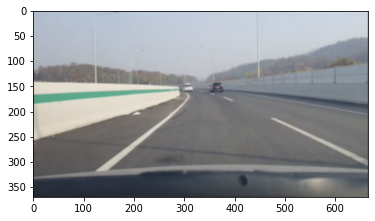

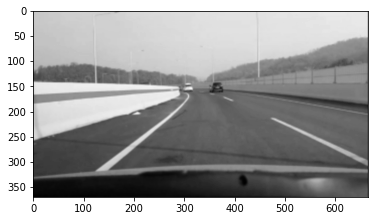

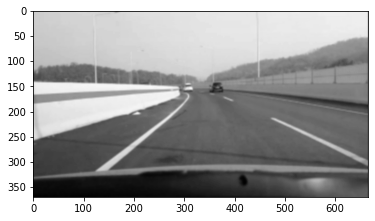

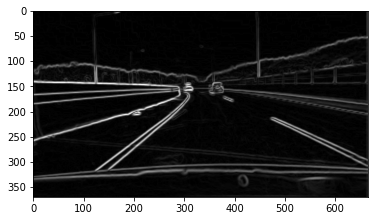

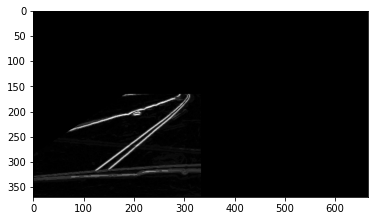

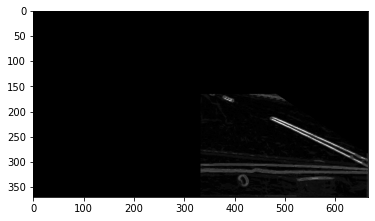

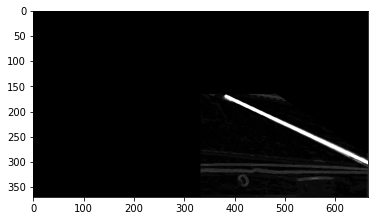

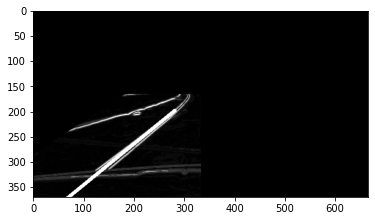

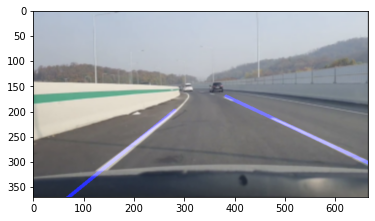

done


In [13]:
# 사진 사용

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

image = cv2.imread('test.png')
cv2_imshow(image, cmap='gray')
height, width = image.shape[:2]

def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, (255, 255, 255))
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    plt.imshow(a, **kwargs)
    plt.show()

def ransac(roi, width=None, side=None):
    df = pd.DataFrame(roi/255).stack().rename_axis(['y', 'x']).reset_index(name='val')

    df = df[df['val']>0.6].reset_index() # 임계점 계산
    x, y = df.loc[:,'x'].values, df.loc[:,'y'].values

    model = linear_model.RANSACRegressor()
    x = x.reshape((-1,1))
    y = y.reshape((-1,1))
    model.fit(x, y)
    
    if side=='l':
        line_X = np.arange(0, int(width / 2)-50)[:, np.newaxis]
    elif side=='r':
        line_X = np.arange(int(width / 2)+50, int(width))[:, np.newaxis]
    line_y = model.predict(line_X)

    line_set1 = (int(line_X[0][0]), int(line_y[0][0]))
    line_set2 = (int(line_X[len(line_X)-1][0]), int(line_y[len(line_y)-1][0]))
    cv2.line(roi, line_set1, line_set2, (255,255,255), 5)

    return line_set1, line_set2


# 흑백
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_img, cmap='gray')

# 가우시안 블러
gaussian_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
cv2_imshow(gaussian_img, cmap='gray')

# 소벨 필터 1번방법
# x = cv2.Sobel(gaussian_img, cv2.CV_64F, 1, 0, ksize=3)
# x = cv2.convertScaleAbs(x)
# y = cv2.Sobel(gaussian_img, cv2.CV_64F, 0, 1, ksize=3)
# y = cv2.convertScaleAbs(y)
# sobel_img = cv2.addWeighted(x,1,y,1,0)
# cv2_imshow(sobel_img, cmap='gray')

# 소벨 필터 2번방법
x = cv2.Sobel(gaussian_img, cv2.CV_64F, 1, 0, ksize=3)
y = cv2.Sobel(gaussian_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_img = np.sqrt(x**2+y**2)
cv2_imshow(sobel_img, cmap='gray')

# l 마스크지정
l_vertices = np.array(
    [[(-130, height), (width / 2 - 150, height / 2-20), (width / 2, height / 2-20), (width / 2, height)]], dtype=np.int32)
l_img = roi(sobel_img, l_vertices)
cv2_imshow(l_img, cmap='gray')

# r 마스크지정
r_vertices = np.array(
    [[(width / 2, height), (width / 2, height / 2-20), (width / 2 + 150, height / 2-20), (width+130, height)]], dtype=np.int32)
r_img = roi(sobel_img, r_vertices)
cv2_imshow(r_img, cmap='gray')

l1, l2 = ransac(l_img, width, side='l')
r1, r2 = ransac(r_img, width, side='r')

cv2_imshow(r_img, cmap='gray')
cv2_imshow(l_img, cmap='gray')

temp_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
cv2.line(temp_img, l1, l2, (255,0,0), 5)
cv2.line(temp_img, r1, r2, (255,0,0), 5)

final = cv2.addWeighted(temp_img, 1, image, 1, 0)
cv2_imshow(final)
print('done')